<h1 align="center"><b>GRIP : The Sparks Foundation</b></h1>

<h1 align="center">Data Science and Business Analytics Intern</h1>

## **Task 1: Prediction using Supervised ML**
### **Predict Percentage of Student based on No. Parameters.**
In this we will use linear regression to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## **Author: Jagrut Manish Thakare**


## Step 1: Generate the Synthetic Dataset
Let's assume we want to predict the percentage of students (e.g., exam scores) based on parameters like study hours, attendance, previous scores, number of extracurricular activities, etc.

In [71]:
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000
study_hours = np.random.normal(5, 2, n_samples)  # Average 5 hours, std deviation 2
attendance = np.random.normal(75, 10, n_samples)  # Average 75%, std deviation 10%
previous_scores = np.random.normal(70, 15, n_samples)  # Average 70%, std deviation 15%
extracurriculars = np.random.randint(0, 5, n_samples)  # Number of extracurricular activities
health_issues = np.random.randint(0, 2, n_samples)  # 0 = no, 1 = yes

# Assuming some relationships for the synthetic percentage calculation
percentage = (
    0.4 * study_hours +
    0.3 * (attendance / 100) * 100 +
    0.2 * previous_scores +
    0.1 * extracurriculars * 10 +
    np.random.normal(0, 5, n_samples)  # Adding some noise
)

# Ensure the percentage is between 0 and 100
percentage = np.clip(percentage, 0, 100)

# Create a DataFrame
data = pd.DataFrame({
    'Study_Hours': study_hours,
    'Attendance': attendance,
    'Previous_Scores': previous_scores,
    'Extracurriculars': extracurriculars,
    'Health_Issues': health_issues,
    'Percentage': percentage
})
# Save the DataFrame to a CSV file
data.to_csv('student_data.csv', index=False)

data = pd.read_csv('student_data.csv')

data.head()


,Study_Hours,Attendance,Previous_Scores,Extracurriculars,Health_Issues,Percentage
0,5.993428,88.993554,59.872326,3,1,52.062593
1,4.723471,84.246337,67.832220,1,1,45.740376
2,6.295377,75.596304,58.113701,0,0,41.130900
3,8.046060,68.530632,65.380577,1,1,30.772594
4,4.531693,81.982233,41.595780,4,0,32.970735


## Step 2: Data Preprocessing
We'll need to preprocess the data to make it suitable for machine learning algorithms.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = data.drop('Percentage', axis=1)
y = data['Percentage']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 3: Train the Model
We'll use several regression algorithms to see which one performs best

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression MSE: {lr_mse}, R2: {lr_r2}")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regressor MSE: {rf_mse}, R2: {rf_r2}")

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print(f"Support Vector Regressor MSE: {svr_mse}, R2: {svr_r2}")


Linear Regression MSE: 28.19059774176938, R2: 0.3979327111539688
Random Forest Regressor MSE: 31.357821323332576, R2: 0.33029023927776635
Support Vector Regressor MSE: 28.53665688093317, R2: 0.3905419176133258


## Step 4: Model Evaluation
Compare the performance of the models using Mean Squared Error (MSE) and R-squared (R2) metrics.

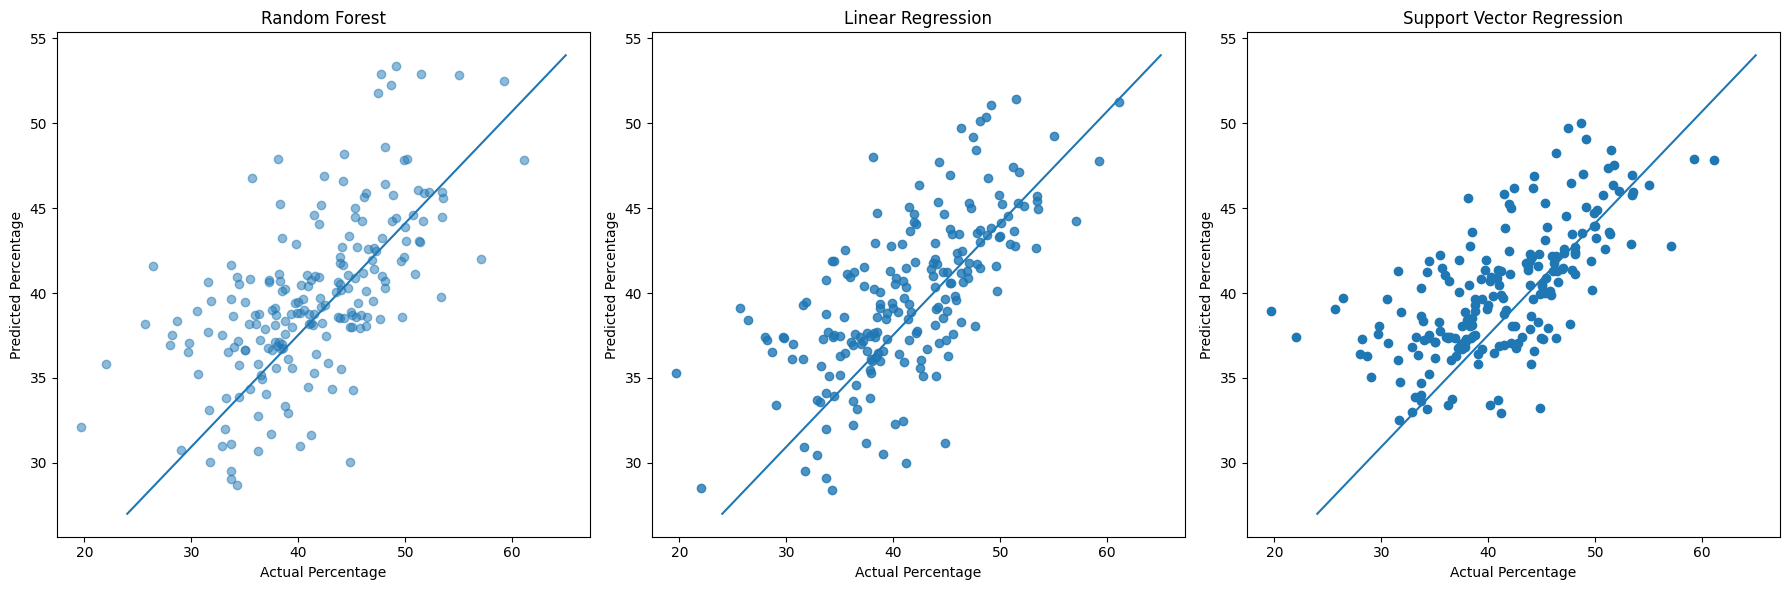

In [74]:
import matplotlib.pylab as plt

# Create a figure with 1 row and 3 columns of subplots

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest
axes[0].scatter(y_test, rf_predictions, alpha=0.5)
axes[0].set_xlabel('Actual Percentage')
axes[0].set_ylabel('Predicted Percentage')
axes[0].set_title('Random Forest')
axes[0].plot([24, 65], [27, 54])

# Linear Regression
axes[1].scatter(y_test, lr_predictions, alpha=0.8)
axes[1].set_xlabel('Actual Percentage')
axes[1].set_ylabel('Predicted Percentage')
axes[1].set_title('Linear Regression')
axes[1].plot([24, 65], [27, 54])

# Support Vector Regression
axes[2].scatter(y_test, svr_predictions)
axes[2].set_xlabel('Actual Percentage')
axes[2].set_ylabel('Predicted Percentage')
axes[2].set_title('Support Vector Regression')
axes[2].plot([24, 65], [27, 54])

# Adjust layout
plt.tight_layout()
plt.show()


## Summary
This script generates a synthetic dataset with parameters that could affect student performance, preprocesses the data, trains several models, and evaluates their performance. RandomForestRegressor often performs well for regression tasks, but it's important to experiment with different models and hyperparameters to find the best fit for your specific dataset.